# Gloabal ocean biogeochemistry

@ejosep

Eren'S: write your goals for this notebook

Ersen'S: write notes on what is not working well

Ersen'S, list 3: write a to-do list

You can write a list like this:
- Item 1
- Item 2

You can write a numbered list:
1. item 1
1. item 2
1. item 3

You can write a to-do list:
- [x] Read several data in one notebook
- [ ] 
- [ ] item 3

You can write in _italics_

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
# import cftime


In [27]:
%matplotlib inline  
#%matplotlib qt5 
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 400
plt.close('all')

__figdir__ = '../plots/' + 'ErsenS_BoB'
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

# define savefig if we want to use if savefig 
savefig = 1


In [3]:
#specify the grid


#xmin, xmax = (-126,-121)
#ymin, ymax = (36.25,38.5)


In [4]:
#file = '/Users/lfp/Documents/GitHub/satellite_python_2022V2/Data/dt_global_allsat_phy_l4_20190909_20210726.nc'
#file = '../Data/dt_global_allsat_phy_l4_20190909_20210726.nc'

directory = '../Data/SLA/*.nc'

#file = '../Data//20190708-IFR-L3C_GHRSST-SSTsubskin-ODYSSEA-GLOB_010_adjusted-v2.0-fv1.0.nc'

In [5]:
#ds = xr.open_dataset(file)

In [6]:
ds = xr.open_mfdataset(directory)

In [12]:
ds

<xarray.Dataset>
Dimensions:                              (time: 2, lon: 3600, lat: 1600)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-07-01 201...
  * lon                                  (lon) float32 -179.9 -179.9 ... 179.9
  * lat                                  (lat) float32 -79.95 -79.85 ... 79.95
Data variables: (12/15)
    sst_dtime                            (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    sea_surface_temperature              (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    solar_zenith_angle                   (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    quality_level                        (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    sses_bias                            (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    sses_standard_deviation              (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    ...                                   ...
    adjusted_sea_surface_temperature     (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    sources_of_sst                       (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    satellite_zenith_angle               (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    bias_to_reference_sst                (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    standard_deviation_to_reference_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    adjusted_standard_deviation_error    (time, lat, lon) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
Attributes: (12/69)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    standard_name_vocabulary:        NCDF Climate and Forecast (CF) Metadata ...
    naming_authority:                org.ghrsst
    netcdf_version_id:               4.6.1 of Sep  8 2018 17:21:01 $
    title:                           Merged collation of sea surface temperat...
    id:                              IFR-L3S-GLOB-ODYSSEA
    ...                              ...
    date_issued:                     2021-03-03T23:53:24
    date_metadata_modified:          2019-02-01T00:00:00
    history:                         collated data file originally produced b...
    uuid:                            68ee15f2-3a8b-43ac-8131-9efc4fc10d24
    file_quality_level:              3
    comment:                         WARNING:Some applications are unable to ...

In [13]:
ds.lat

<xarray.DataArray 'lat' (lat: 1600)>
array([-79.95, -79.85, -79.75, ...,  79.75,  79.85,  79.95], dtype=float32)
Coordinates:
  * lat      (lat) float32 -79.95 -79.85 -79.75 -79.65 ... 79.75 79.85 79.95
Attributes:
    standard_name:  latitude
    axis:           Y
    long_name:      latitude
    units:          degrees_north

In [65]:
timeindex = 0
timeindex = 1
sst = ds.sea_surface_temperature

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_49345/1578181391.py:2: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad=100.0) # space between the graphs
/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_49345/1578181391.py:32: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


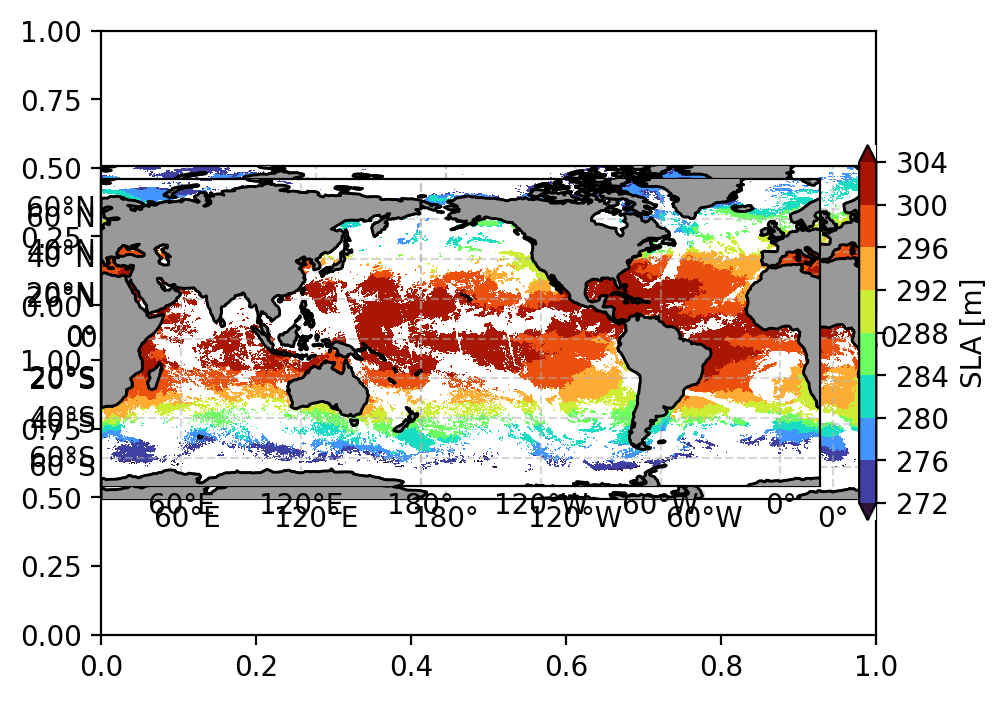

In [70]:
fig, ax = plt.subplots(2)
fig.tight_layout(pad=100.0) # space between the graphs
ax[0] = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#ax[0] = plt.set_title('Sea level anomaly')
ax[1] = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
#ax[1] = plt.set_title('Sea level anomaly')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#[xmin, xmax, ymin, ymax] = [-15,15,-15,9]
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl0 = ax[0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl1 = ax[1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl0.top_labels = False
gl0.ylabels_right = False
gl1.top_labels = False
gl1.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax[0].contourf(ds.lon,ds.lat,np.squeeze(sst[0,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
cs = ax[1].contourf(ds.lon,ds.lat,np.squeeze(sst[1,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax[0].coastlines()
ax[0].add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
ax[1].coastlines()
ax[1].add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_49345/2532104085.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


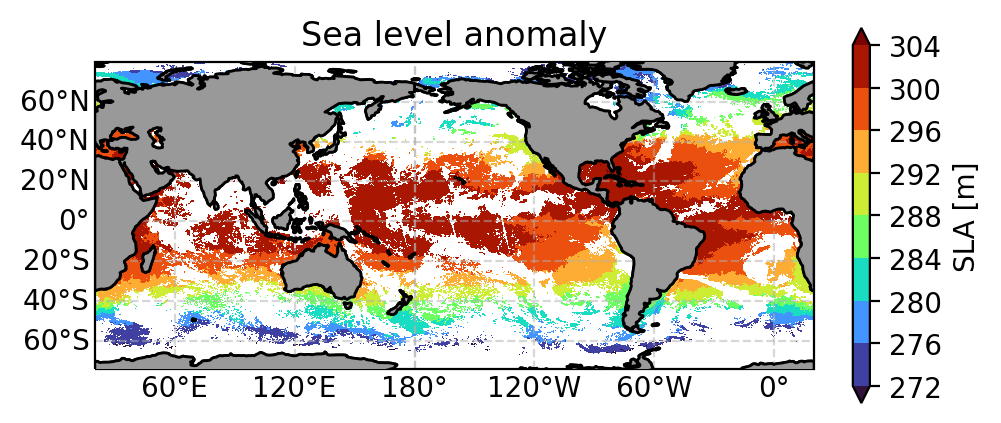

In [41]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea level anomaly')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#[xmin, xmax, ymin, ymax] = [-15,15,-15,9]
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst[timeindex,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_49345/560607483.py:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cs,fraction = 0.022, extend='both')


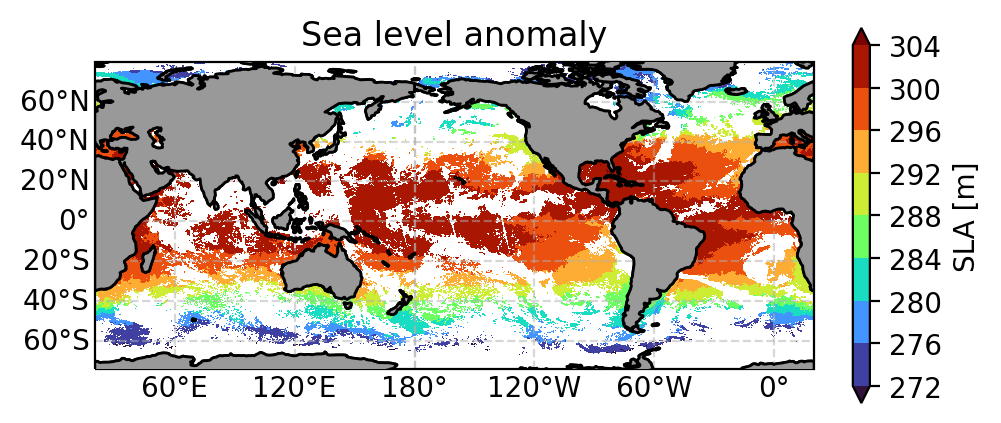

In [61]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('Sea level anomaly')
#set the size of the axis 
#extent = [xmin, xmax, ymin, ymax]
#[xmin, xmax, ymin, ymax] = [-15,15,-15,9]
#ax.set_xlim(xmin, xmax)
#ax.set_ylim(ymin, ymax)

#ax.set_title('Sea level anomaly (DUACS)')

#plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlocator = matplotlib.ticker.MaxNLocator(10)
#gl.xlocator = matplotlib.ticker.AutoLocator
# gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(0, 360 ,30))

levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst[1,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
# cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
# cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

#plot_ops_area(ax,transform=ccrs.PlateCarree(),color='w')


if savefig:
    plt.savefig(__figdir__+'_SLA'+plotfiletype,**savefig_args)

# Add a 10 km scale bar